<a href="https://colab.research.google.com/github/Dominique-Thorendal-Research/Pairs-Trading/blob/main/Pairs_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pairs Trading Strategy

## 1. Find 2 stocks that are cointegrated

https://www.youtube.com/watch?v=uZcw-CZdTwI

### Brainstorm
**Svenska investment bolag**
- Investor
- Kinnveik
- Industrivärden C

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from itertools import combinations

In [2]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META', 'UNH', 'JPM',
    'XOM', 'JNJ', 'V', 'PG', 'HD', 'MA', 'LLY', 'CVX', 'MRK', 'PEP',
    'KO', 'ABBV', 'PFE', 'BAC', 'WMT', 'COST', 'CMCSA', 'TMO', 'ACN', 'CRM',
    'NFLX', 'INTC', 'DIS', 'QCOM', 'MCD', 'SBUX', 'GS', 'MS', 'GE', 'IBM'
]
print(f"Successfully loaded {len(tickers)} S&P 500 tickers.")

Successfully loaded 39 S&P 500 tickers.


In [3]:
df = yf.download(tickers, start='2020-01-01')['Close']

/tmp/ipython-input-3837736623.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2020-01-01')['Close']
[*********************100%***********************]  39 of 39 completed


In [4]:
df

Ticker,AAPL,ABBV,ACN,AMZN,BAC,CMCSA,COST,CRM,CVX,DIS,...,PFE,PG,QCOM,SBUX,TMO,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,72.468262,69.823456,192.515030,94.900497,30.920330,38.592068,266.497498,165.251694,92.917885,145.769913,...,27.955408,106.273254,78.043121,78.221725,321.580048,28.684000,267.026398,183.186249,36.508102,53.661732
2020-01-03,71.763718,69.160706,192.194443,93.748497,30.278320,38.285847,266.716949,164.440231,92.596504,144.097778,...,27.805429,105.558510,76.573601,77.766495,318.082245,29.534000,264.324188,181.729340,36.185802,53.230293
2020-01-06,72.335548,69.706497,190.939362,95.143997,30.234940,37.996643,266.790070,171.644455,92.282776,143.261719,...,27.769709,105.704872,76.124825,77.153671,320.368073,30.102667,266.159088,181.336380,36.112148,53.639008
2020-01-07,71.995361,69.308853,186.817001,95.343002,30.035398,38.398315,266.369537,174.167892,91.104347,143.310898,...,27.676859,105.050423,78.289520,76.917297,322.181152,31.270666,264.552460,180.857132,35.777561,53.200024
2020-01-08,73.153496,69.800064,187.183426,94.598503,30.339060,38.791443,269.423126,175.484070,90.063698,143.015808,...,27.898272,105.498184,78.060722,77.810265,322.693481,32.809334,270.130341,183.953018,35.654797,52.397751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-17,267.459991,234.000000,241.330002,232.869995,51.480000,27.219999,912.590027,237.029999,153.110001,105.690002,...,25.080000,145.820007,166.750000,83.690002,567.159973,408.920013,320.519989,325.750000,102.949997,117.680000
2025-11-18,267.440002,233.869995,240.000000,222.550003,51.639999,27.360001,895.080017,233.500000,153.619995,106.279999,...,25.450001,146.990005,165.059998,83.330002,576.030029,401.250000,313.579987,321.179993,101.389999,119.029999
2025-11-19,268.559998,232.910004,241.080002,222.690002,52.020000,26.870001,890.599976,227.880005,151.699997,104.669998,...,24.879999,146.990005,166.110001,83.680000,573.789978,403.989990,309.089996,324.119995,100.610001,117.349998


In [5]:
combi_df = pd.DataFrame(combinations(df.columns,2))
combi_df.columns = ['Stock 1', 'Stock 2']
combi_df

,Stock 1,Stock 2
0,AAPL,ABBV
1,AAPL,ACN
2,AAPL,AMZN
3,AAPL,BAC
4,AAPL,CMCSA
...,...,...
736,UNH,WMT
737,UNH,XOM
738,V,WMT
739,V,XOM


In [6]:
combi_df['Correlation'] = combi_df.apply(lambda row: np.corrcoef(df[row['Stock 1']], df[row['Stock 2']])[0,1], axis=1)

In [7]:
combi_df = combi_df [combi_df['Correlation']>0.95]

In [8]:
combi_df

,Stock 1,Stock 2,Correlation
305,CVX,XOM,0.959922
336,GE,GS,0.952478
338,GE,IBM,0.967540
341,GE,JPM,0.977336
344,GE,MA,0.950521
351,GE,NVDA,0.977569
361,GE,WMT,0.961441
394,GS,JPM,0.982188
401,GS,MS,0.980153
443,IBM,JPM,0.960981


Gör Augmented Dickey–Fuller (ADF) Test: test whether the cointegration residuals are **stationary.**

- Linear regression: y = Alpha + Beta * X + epsilon
- y=stock 2, X=stock 1.

OLS = Minmiera squared errors (distance between observed value in y and predicted value from regression (right part of eq above))

Rediduals = epsilon = y - (Alpha + Beta * X)



In [9]:
def do_reg(stock1, stock2):
    X = df[stock1].values
    y = df[stock2].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha, beta = model.params

    residuals = y - (alpha + beta * X[:,1])

    if np.isnan(residuals).any():
        return np.nan

    adf_result = adfuller(residuals)

    return adf_result[0], adf_result[1], beta, alpha



In [10]:
combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)

/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)
/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combi_df[['adf_stat','p_value','beta','alpha']] = combi_df.apply(lambda row:pd.Series(do_reg(row['Stock 1'],row['Stock 2'])),axis=1)
/tmp/ipython-input-2286546503.py:1: SettingWithCopyWarning: 
A value is trying to 

In [11]:
combi_df[combi_df['p_value']<0.01].sort_values(by='adf_stat')

,Stock 1,Stock 2,Correlation,adf_stat,p_value,beta,alpha
463,IBM,WMT,0.967288,-4.259783,0.000521,0.343628,6.420403
585,MA,V,0.988455,-4.191535,0.000681,0.588261,7.709626
453,IBM,NVDA,0.954001,-4.126248,0.000876,0.905740,-77.332435
446,IBM,MA,0.956547,-4.083410,0.001032,1.493782,176.502200
738,V,WMT,0.953041,-3.784291,0.003072,0.364293,-30.767003
443,IBM,JPM,0.960981,-3.693945,0.004199,1.022081,7.686651
529,JPM,WMT,0.959859,-3.643438,0.004983,0.320605,6.292538
338,GE,IBM,0.967540,-3.606871,0.005631,0.759879,68.536187
351,GE,NVDA,0.977569,-3.584919,0.006056,0.728916,-19.430827
512,JPM,MA,0.961904,-3.556135,0.006657,1.412348,173.009346


In [12]:
spread = df['WMT'] - (6.420404 + 0.343628 * df['IBM'])

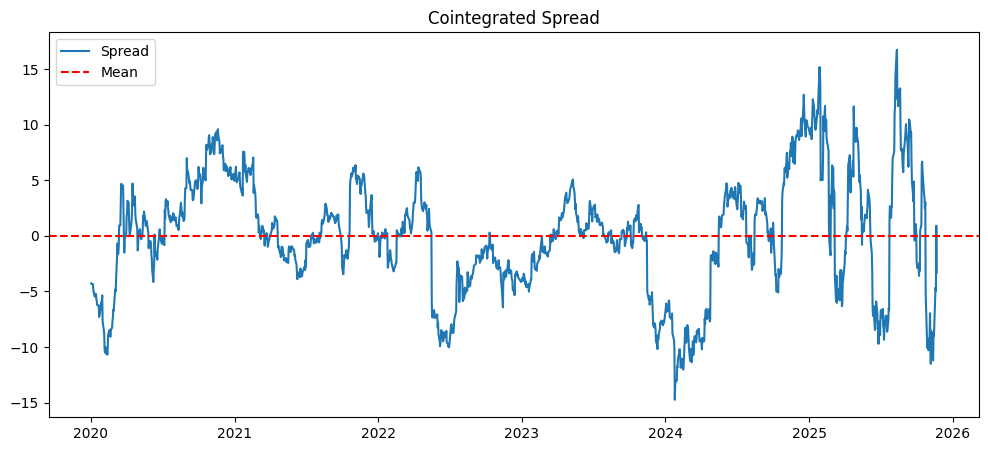

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
plt.plot(spread, label = 'Spread')
plt.axhline(spread.mean(), color = 'r', linestyle = '--', label = 'Mean')
plt.legend()
plt.title('Cointegrated Spread')
plt.show()

# 2. Backtest Pairs Trading Strategy
https://www.youtube.com/watch?v=qUMW9LEv4Qw

In [19]:
tickers = ['IBM', 'WMT']
df_chosen = df.loc[:, tickers]
df_chosen.head(3)

Ticker,IBM,WMT
Date,,
2020-01-02,100.013771,36.508102
2020-01-03,99.216118,36.185802
2020-01-06,99.038879,36.112148


In [21]:
# Parameters come from alpha and beta
# But now, we need these on a rolling basis. -> Run a rolling regression
rolling_window = 252
stock1,stock2 = tickers

rolling_alpha = [np.nan] * rolling_window
rolling_beta = [np.nan] * rolling_window

In [22]:
for i in range(rolling_window, len(df_chosen)):
  past_data = df_chosen.iloc[i-rolling_window:i]

  X = past_data[stock1].values
  y = past_data[stock2].values
  X = sm.add_constant(X)

  model = sm.OLS(y, X).fit()
  rolling_alpha.append(model.params[0])
  rolling_beta.append(model.params[1])



In [46]:
rolling_params = pd.DataFrame({'Rolling Alpha':rolling_alpha,
                               'Rolling Beta': rolling_beta}, index=df_chosen.index)

In [47]:
rolling_params

,Rolling Alpha,Rolling Beta
Date,,
2020-01-02,NaN,NaN
2020-01-03,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
...,...,...
2025-11-17,61.653538,0.136941
2025-11-18,61.986761,0.135714
2025-11-19,62.436280,0.134033


In [48]:
df_chosen[stock1]

,IBM
Date,
2020-01-02,100.013771
2020-01-03,99.216118
2020-01-06,99.038879
2020-01-07,99.105331
2020-01-08,99.932503
...,...
2025-11-17,297.170013
2025-11-18,289.950012
2025-11-19,288.529999


In [49]:
rolling_params['Rolling Beta']

,Rolling Beta
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2025-11-17,0.136941
2025-11-18,0.135714
2025-11-19,0.134033


In [50]:
spread = df_chosen[stock2] - (rolling_params['Rolling Alpha'] + rolling_params['Rolling Beta'] * df_chosen[stock1])

In [51]:
spread

,0
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2025-11-17,0.601563
2025-11-18,0.053000
2025-11-19,-0.498926


The trading strategy is based on this spread.
- Z-score
- STrategy: Usually:
- When low: -> go Long
- WHen high -> Go short


In [52]:
rolling_mean = spread.rolling(252).mean()
rolling_std = spread.rolling(252).std()
z_score = (spread - rolling_mean) / rolling_std
z_score

,0
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2025-11-17,-0.044170
2025-11-18,-0.123757
2025-11-19,-0.203363


In [53]:
spread_data = pd.DataFrame({'spread':spread,
                            'rolling mean': rolling_mean,
                            'rolling std' :rolling_std,
                            'z-score': z_score},
                            index=df.index)

In [54]:
spread_data

,spread,rolling mean,rolling std,z-score
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN
2020-01-06,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2025-11-17,0.601563,0.888687,6.500386,-0.044170
2025-11-18,0.053000,0.855304,6.482897,-0.123757
2025-11-19,-0.498926,0.814578,6.458902,-0.203363


<Axes: xlabel='Date'>

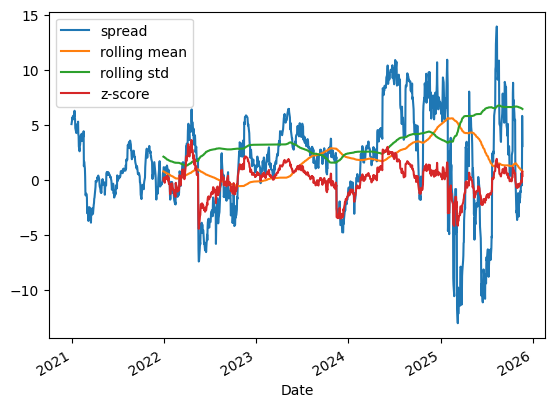

In [55]:
spread_data.plot()